### What is Elbow Method for optimal value of k in KMeans:
- In K-Means clustering, the algorithm partitions data into k clusters by minimizing the distance between points and their cluster centroids.
- However, deciding the ideal k is not straight forward.
- The Elbow method helps by plotting Within-cluster sum of squares (WCSS) against increasing k values and looking for a point where the improvement slows down, this point is called the "elbow".
### Working of Elbow Point:
- The Elbow method works in the follwing steps -
  1. We begin by selecting a range of k values (for example, 1 to 10).
  2. For each k, we run K-Means and calculate WCSS(Within-cluster sum of squares), which shows how close the data points are to their cluster centroids.
  3. After computing WCSS for all k values, we plot k vs WCSS.
  4. WCSS always decreases as k increases because more clusters reduce the internal spread.
  5. However, after a certain point, the improvement becomes very small.
- This bend or "Elbow" in the curve indicates the point where adding more clusters no longer gives meaningful improvement.
### Understanding Distortion and Inertia in K-Means Clustering:
- Two metrics are commonly used in the Elbow Method are Distortion and Inertia.
####  1. Distortion:
- Distortion measures the average squared distance between each data point and its assigned cluster center.
- It's a measure of how well the clusters represnt the data.
- A lower distortion value indicates better clustering.
- Formula will be - Distortion = 1/n ∑ |x(i)- c|²
  - x(i) - is the ith data point.
  - c - is a cluster center from the set of all cluster centroids.
  - |x(i)-c|² - is the squared Euclidean distance between the data point and the cluster center.
  - n - is the total number of data points.
#### 2. Inertia:
- Inertia is sum of sqaured distances of each data point to its closest cluster center.
- It's essentially the total squared error of the clustering.
- Like distortion, a lower inertia value suggests better clustering.
- Formula will be, Inertia = ∑distance(x(i),c)²
- In the Elbow Method, we compute distortion or inertia for different k values and plot them.
- The point where the decrease begins to slow the "elbow" usually indicates the optimal number of clusters.

### Implementation of Elbow Method:
#### 1. Importing the required Libraries:
- We will import numpy, matplotlib, scikit-learn and scipy for this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

#### 2. Creating and Visualizing the data:
- We will create a random array and visualize its distribution.

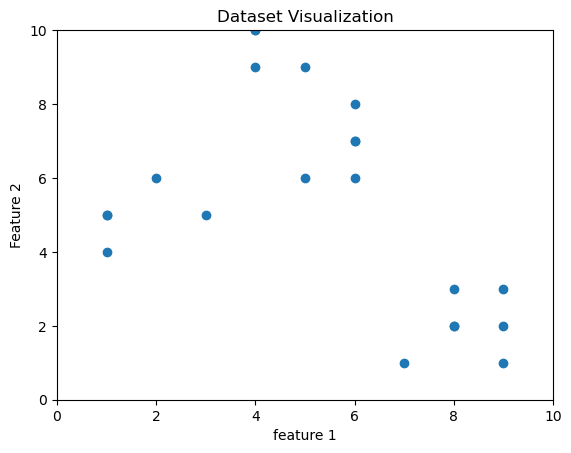

In [2]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.scatter(x1, x2, marker='o')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('feature 1')
plt.ylabel('Feature 2')
plt.show()

- From the above visualization, we can see that the optimal number of clusters should be around 3.
- But visualizing the data alone cannot always give the right answer.

#### 3. Building the clustering Model and Calculating Distortion and Inertia:
- In this step, we will fit the K-means model for different values of k ( number of clusters) and calculate both the distortion and inertia for each value.

In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

#### 4. Tabulating and Visualizing the Results:
#### a. Displaying Distortion Values:

Distortion values:
1 : 14.90249433106576
2 : 5.146258503401359
3 : 1.8817838246409675
4 : 0.856122448979592
5 : 0.7166666666666667
6 : 0.5484126984126984
7 : 0.4325396825396825
8 : 0.3817460317460318
9 : 0.3341269841269841


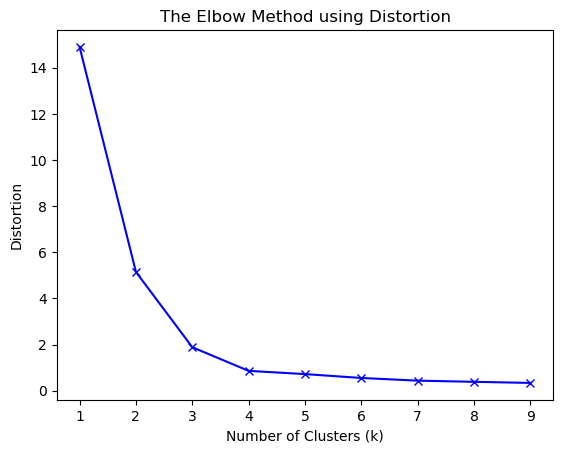

In [7]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### b. Displaying Inertia Values:

Insertia values:
1:312.95238095238096
2:108.07142857142856
3:39.51746031746032
4:17.978571428571428
5:15.049999999999999
6:11.516666666666666
7:9.083333333333332
8:8.016666666666667
9:7.0166666666666675


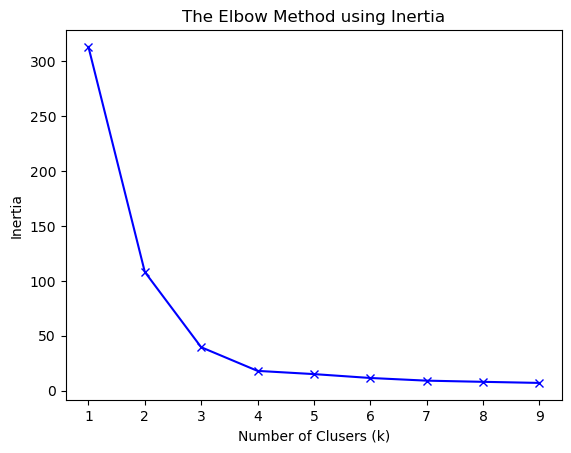

In [11]:
print("Insertia values:")
for key, val in mapping2.items():
    print(f'{key}:{val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusers (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### 5. Clustered Data Points For Different k Values:
- We will plot images of data points clustered for different values of k.
- For this, we will apply the k-means algorithm on the dataset by iterating on a range of k values.
                                              

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


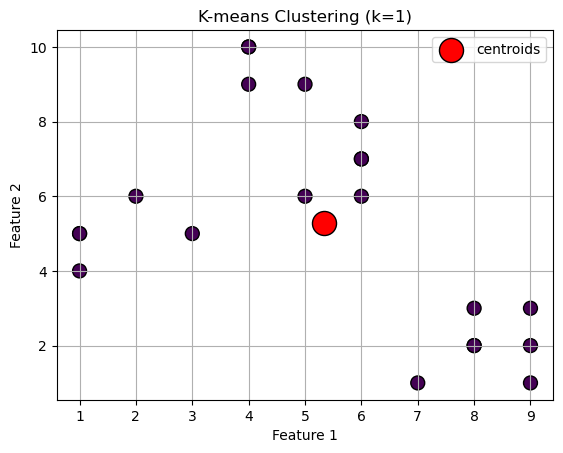

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


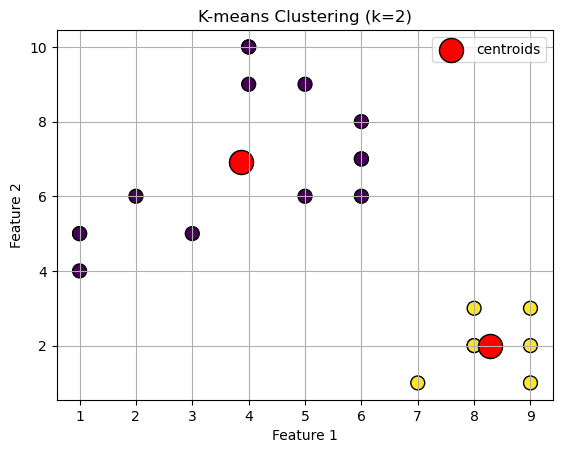

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


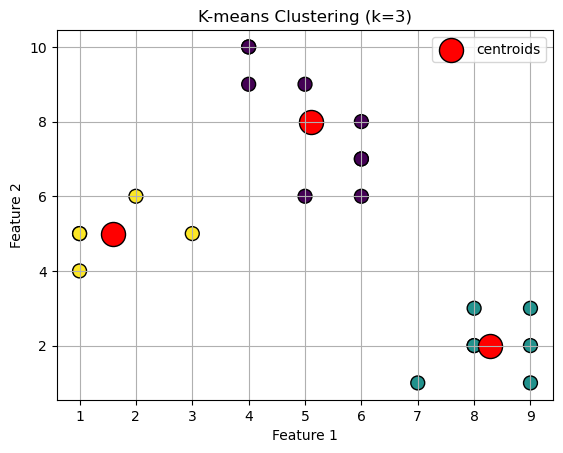

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


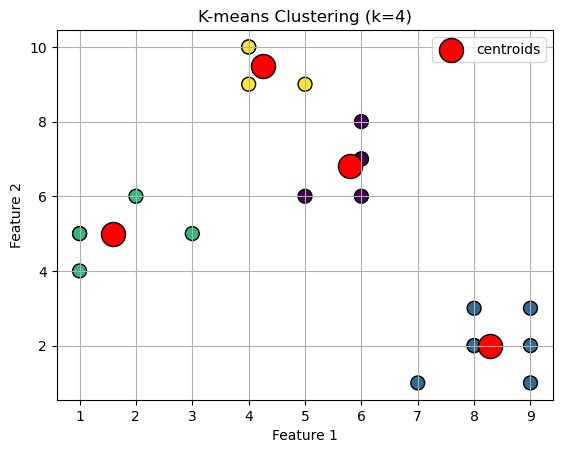

In [12]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', marker='o',
    edgecolor = 'k', s=100)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    s = 300, c='red', label='centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()